<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Evaluaciones/Taller2/Taller_evaluado_2_kickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción Ciencia de Datos con R: Taller 2



Nombre 1: _Puede incluir su nombre acá haciendo doble click_                                                                                                                                      <br> 
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases y ayudantía, sin embargo, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día **domingo 08 de noviembre** hasta las 23:59 hrs para hacer envío de sus respuestas. Esto debido a temas administrativos para efectos del cierre del curso, por lo que no es posible extender dicha fecha de entrega más allá del plazo mencionado, razón por la cual esta evz la extensión del taller es considerablemente menor que el anterior.

Una vez finalizado el desarrollo del taller, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 1. Descargue el notebook en **formato ipynb** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, Taller1_nombres_integrantes.ipynb. 
    En caso de trabajar en Rstudio, deberá enviar el script de extensión *.R con el siguiente nombre: Taller1_nombres_integrantes.R , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo bastian.aballayleiva@gmail.com, con copia a majorquev@gmail.com con el **asunto** "ICD-SII-T2: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "ICD-SII-T2" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:05 hrs del lunes 09 de noviembre, su nota máxima será un 6.0.
   
   

# Seguros médicos
El siguiente taller tiene por objetivo comprender distintas variables que inciden en el valor de la prima de un determinado seguro médico. Para ello usted contará con un dataset con la siguiente información:

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


Más info la puede encontrar en el siguiente link https://www.kaggle.com/mirichoi0218/insurance

In [21]:
## Carga de datos
library(tidyverse)
data <- read.csv("https://raw.githubusercontent.com/majorquev/Introduccion_a_ciencia_de_datos_R/master/Evaluaciones/Taller1/insurance.csv")


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(data)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.900,0,yes,southwest,16884.924
2,18,male,33.770,1,no,southeast,1725.552
3,28,male,33.000,3,no,southeast,4449.462
4,33,male,22.705,0,no,northwest,21984.471
5,32,male,28.880,0,no,northwest,3866.855
6,31,female,25.740,0,no,southeast,3756.622


**P1)** Con el objetivo de explorar los datos obtenidos y comprender  las relaciones existentes, genere un breve análisis descriptivo del dataset `data`. Para ello considere los siguientes aspectos a incluir, según el tipo de variable a analizar:

  * Para el caso de las variables numéricas debe incluir al menos:
    1. (1pt) Estadísticos descriptivos como cuantiles, promedios, desviación estándar de **todas** las variables numéricas.
    2. (2pts) Uno o varios histogramas.
    3. (2pts) Uno o varios boxplots.
    4. (2pts) Uno o varios gráficos de dispersión entre dos variables de interés.
    5. (2pts) Matriz de correlación y su visualización.
    6. (3pts) Un breve análisis de outliers para el caso de la variable `charges` (prima del seguro). Para ello utilice el **criterio del rango intercuartílico** para identificar los casos atípicos. 
      * Identifique estos casos en el dataset original e **incluya una columna llamada `es_outlier`**, que idique un 1 en caso de ser una obs atípica y un 0 en caso contrario. Esta columna será utilizada más adelante 

  * Para el caso de las variables categóricas debe incluir al menos:
    1. (2pts) Una o varias tablas con los conteos de una o más variables de interés y comentar.
    2. (2pts) Uno o varios gráficos de barra para alguna(s) de las categorías de interés.
    3. (2pts) Al menos un boxplot de una variable numérica, pero **aperturado por una variable categórica** (ejemplo: `aes(x = sex, y = charges)`)


In [43]:
# Respuesta
summary(data)
data$sex <- as.factor(data$sex)
data$smoker <- as.factor(data$smoker)
data$region <- as.factor(data$region)

      age            sex           bmi           children     smoker    
 Min.   :18.00   female:662   Min.   :15.96   Min.   :0.000   no :1064  
 1st Qu.:27.00   male  :676   1st Qu.:26.30   1st Qu.:0.000   yes: 274  
 Median :39.00                Median :30.40   Median :1.000             
 Mean   :39.21                Mean   :30.66   Mean   :1.095             
 3rd Qu.:51.00                3rd Qu.:34.69   3rd Qu.:2.000             
 Max.   :64.00                Max.   :53.13   Max.   :5.000             
       region       charges      es_outlier     
 northeast:324   Min.   : 1122   Mode :logical  
 northwest:325   1st Qu.: 4740   FALSE:1199     
 southeast:364   Median : 9382   TRUE :139      
 southwest:325   Mean   :13270                  
                 3rd Qu.:16640                  
                 Max.   :63770                  

In [39]:
# P 1.6
# limite_inf = Q1 - 1.5*IQR
# limite_sup = Q3 + 1.5*IQR
# x > limite_sup | x < limite_inf

# IQR
charges_iqr <- IQR(data$charges)
charges_iqr
# IQR2
charges_iqr2 <- quantile(data$charges,0.75) -quantile(data$charges,0.25)
charges_iqr2
# Q1 - 1.5 * IQR
lim_inf <- quantile(data$charges,0.25) - 1.5*IQR(data$charges)
lim_inf
# Q3 + 1.5 * IQR
lim_sup <- quantile(data$charges,0.75) + 1.5*IQR(data$charges)
lim_sup
# outlier SI: x > limite_sup | x < limite_inf
data$es_outlier <- data$charges > lim_sup | data$charges < lim_inf

data %>% arrange(desc(charges))

[1] 11899.63

75% 
11899.63

25% 
-13109.15

75% 
34489.35

age,sex,bmi,children,smoker,region,charges,es_outlier
<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<lgl>
54,female,47.410,0,yes,southeast,63770.43,TRUE
45,male,30.360,0,yes,southeast,62592.87,TRUE
52,male,34.485,3,yes,northwest,60021.40,TRUE
31,female,38.095,1,yes,northeast,58571.07,TRUE
33,female,35.530,0,yes,northwest,55135.40,TRUE
60,male,32.800,0,yes,southwest,52590.83,TRUE
28,male,36.400,1,yes,southwest,51194.56,TRUE
64,male,36.960,2,yes,southeast,49577.66,TRUE
59,male,41.140,1,yes,southeast,48970.25,TRUE


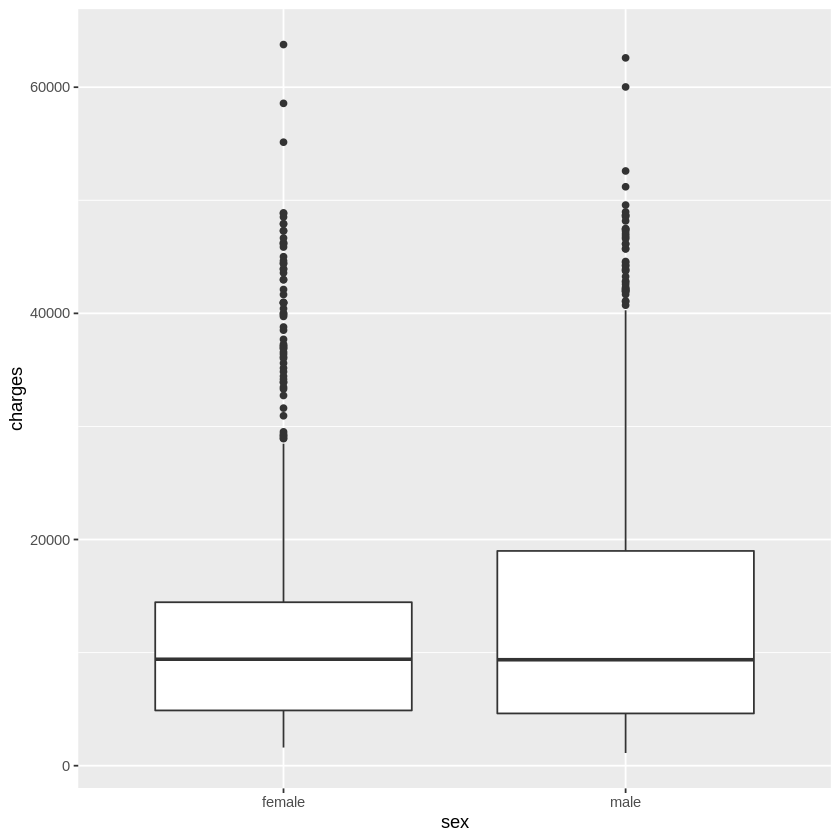

In [46]:
ggplot(data, aes(x=sex, y=charges)) + 
  geom_boxplot()

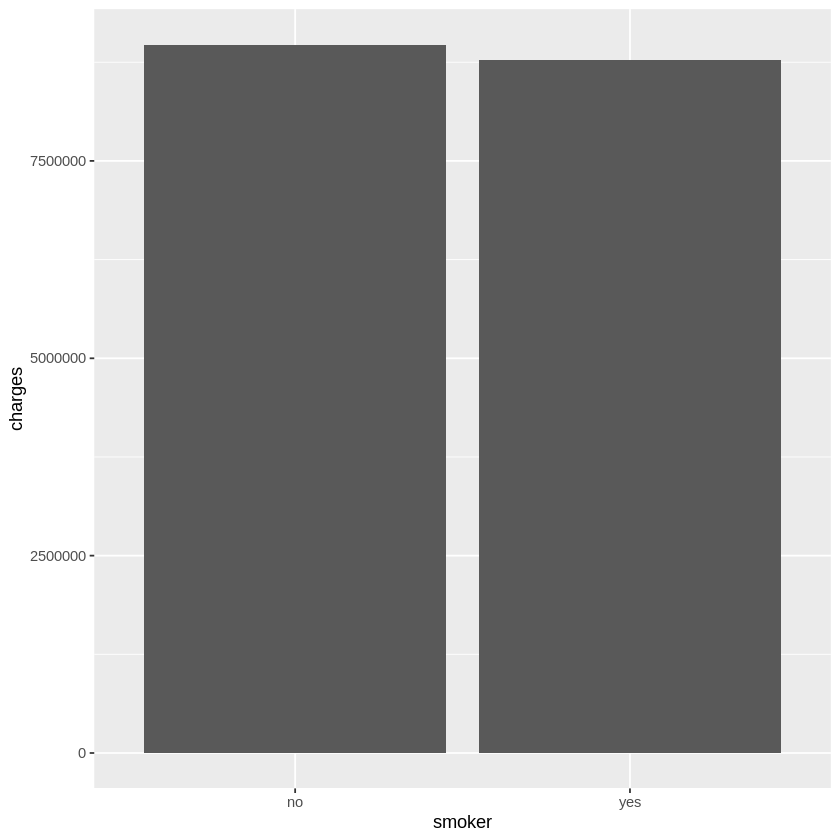

In [47]:
ggplot(data, aes(x=smoker, y=charges)) +
  geom_bar(stat="identity") # tendrá sentido este barplot?

**P2)** En esta segunda etapa usted deberá explorar las variables que inciden en la asignación de la prima del seguro (charges). Para ello explore lo siguiente:
  1. (1pt) Genere un árbol de decisión con el package rpart, que modele como variable respuesta la variable `charges` que indica el perio de la prima del seguro y como variables descriptoras `age, sex,	bmi,	children,	smoker,	region`. Considere **los parámetros por defectos para esta pregunta**, no es necesario realizar la poda del árbol (lo veremos la clase del 02 de noviembre).
  2. (1pt) Visualice el árbol obtenido utilizando la función `rpart.plot::rpart.plot` (si está en colab) o `visNetwork::visTree` (si está en Rstuio)
  3. (2pts) Comente sobre las variables más importantes en función de la visulaización generada.
  4. (2pts) Describa los segmentos de interés. Por ejemplo ¿qué grupos de la muestra tienen mayores primas?¿Qué grupos de la muestra poseen primas menores?


**NOTA:** Recuerde que en este caso su variable respuesta es una variable numérica, por tanto los nodos terminales contienen como respuesta el promedio de la prima de todas las observaciones del nodo respectivo.


In [49]:
library(rpart)
#install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
data_arbol <- data %>% select(-c(es_outlier))
arbol <- rpart(charges ~ ., data = data_arbol) # 1pt

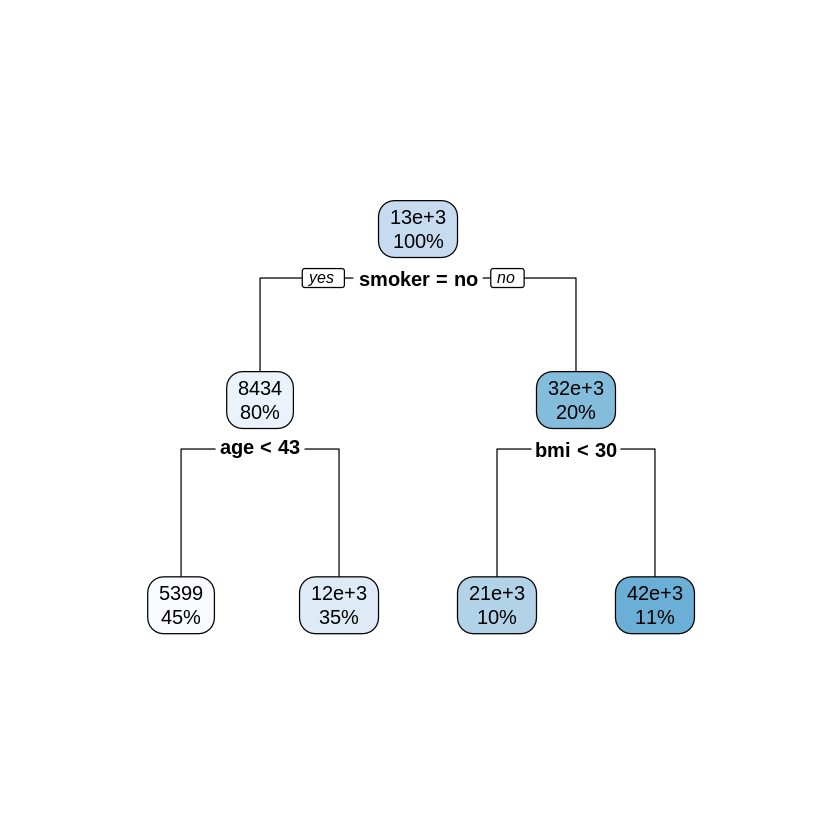

In [58]:
rpart.plot(arbol) # 1pt

**P3)** Considerando sólo las variables numéricas, compare los algoritmos **k-means**  y **clustering jerárquico**, para identificar grupos en función de las siguientes variables `age, bmi` y `charges`.

**NOTA1:** Para el cluster jerárquico considere como distancia el método **complete**.


  1.(4pts) Decida una cantidad de clusters **no menor a 5** mediante el método del codo para el caso de k-means y mediante el ancho de siluetas para el caso de cluster jerárquico.

  2.(2pts) Cree dos nuevas columnas en el dataset, llamadas `cl_km` y `cl_hc`, que contenga el número del cluster al cual fue asignado cada observación, según el algoritmo kmeans y cluster jerárquico respectivamente.

  3.(3pts) Describa los grupos generados por ambos algoritmos (cantidad de registros por grupo, promedio de edad en cada grupo, promedio de bmi y promedio de charges) y escoja uno de los dos algoritmos.

  4.(2pts) Genere un gráfico entre todos los pares de variables numéricas y coloree según el cluster al cual pertenece cada observación, de acuerdo al algoritmo seleccionado por usted.
  
  5.(2pts) Replique el gráfico anterior, pero esta vez coloree según el valor de la variable `es_outlier`, creada en la pregunta **P1.6**.


  **NOTA2:** Considere **escalar** los datos antes de implementar los algortimos de clusterización.

In [59]:
data_num <- data %>% select(charges, bmi, age)
scaled_data_num <- as.data.frame(scale(data_num))

In [64]:
kmeans_cluster <- kmeans(x = scaled_data_num, centers = 10)

In [65]:
str(kmeans_cluster)

List of 9
 $ cluster     : int [1:1338] 6 3 3 6 5 9 5 5 5 10 ...
 $ centers     : num [1:10, 1:3] 1.988 -0.48 -0.825 2.582 -0.493 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:10] "1" "2" "3" "4" ...
  .. ..$ : chr [1:3] "charges" "bmi" "age"
 $ totss       : num 4011
 $ withinss    : num [1:10] 82.6 59.7 74.8 69.3 66.9 ...
 $ tot.withinss: num 718
 $ betweenss   : num 3293
 $ size        : int [1:10] 86 73 179 74 201 91 173 122 179 160
 $ iter        : int 5
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [67]:
# K-means
ttwss_df <- data.frame()
for (k in 2:20){
  kmeans_cluster <- kmeans(x = scaled_data_num, centers = k)
  ttwss <- kmeans_cluster$tot.withinss
  aux <- data.frame(K = k, ttwss = ttwss)
  ttwss_df <- bind_rows(ttwss_df, aux)
}
 
ttwss_df


K,ttwss
<int>,<dbl>
2,2748.5516
3,1973.4755
4,1508.2054
5,1229.2556
6,1103.1337
7,1010.9139
8,878.6376
9,873.7741
10,716.7927


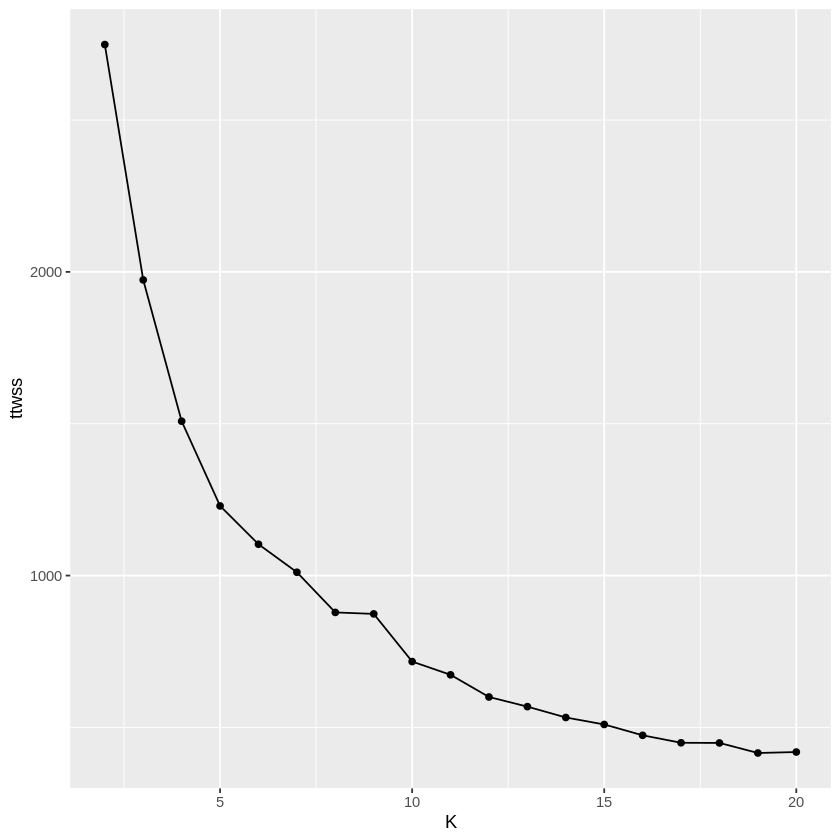

In [70]:
ggplot(data = ttwss_df, aes(x = K, y = ttwss)) + geom_point() + geom_line()
# 8

In [72]:
hc_cluster <- hclust(dist(data_num), method="complete")

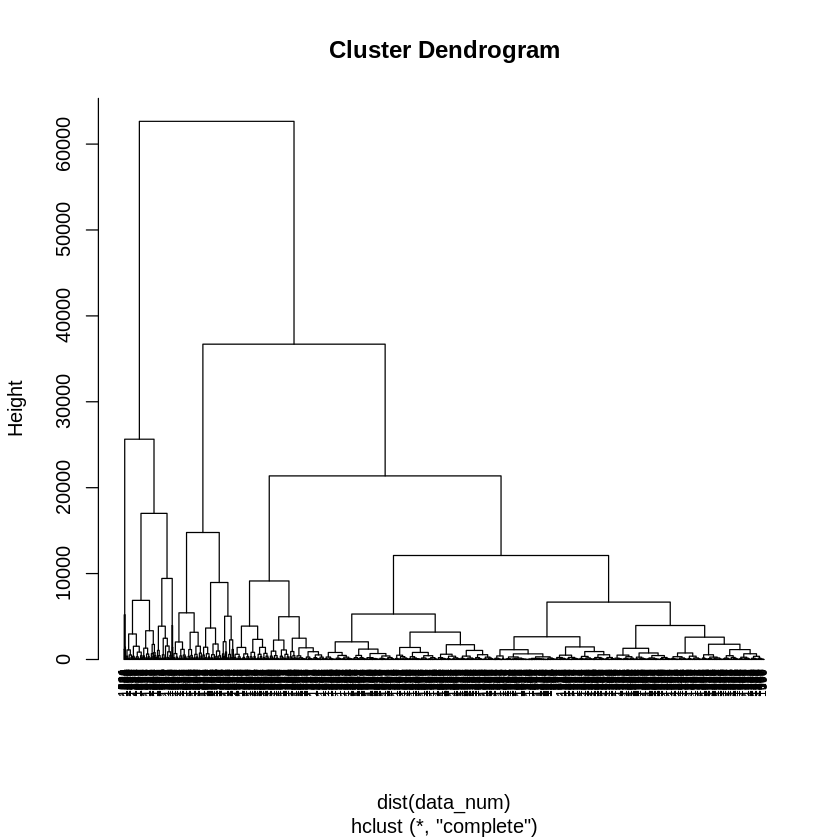

In [75]:
plot(hc_cluster, 
     hang   = -1, #posición inicio dendograma
     cex    = .6)



**P4)** A continuación usted deberá modelar el valor de la prima del seguro (variable charges), mediante un modelo de regresión lineal. Para ello considere como variables predictoras todas las variables del dataset salvo las columnas `charges`, `cl_km` y `cl_hc`

 1. Mediante la función `lm`, implemente un modelo de regresión con todas las variables indicadas en el párrafo anterior, pero **excluya** los registros con primas atípicamente altas, para ello no considere los registros en que el campo `es_outlier` es igual a 1.

 2.(2pts) Comente sobre la calidad del ajuste de este modelo. Para ello considere el valor-p asociado al estadístico F del resumen del modelo. ¿Es un modelo pertinente?
 3.(2pts) Comente sobre la calidad del ajuste en términos del valor de $R^2$ . ¿Cuánta de la variabilidad real es explicada por este modelo?
 4.(3pts) Comente sobre la significancia de las variables incluídas en este modelo. ¿Son todas significativas? Recuerde lo indicado en ayudantía respecto de la interpretación de los coeficientes estimados asociados a una variable categórica en un modelo lineal.
 5.(2pts) Teniendo en cuenta el signifiado de los coeficientes de un modelo de regresión lineal ¿cuál es la variable más importante en este modelo al momento de estimar la prima del seguro?¿se condice con lo estudiado en el árbol de decisión?
 6.(2pts) ¿En cuánto aumenta la prima esperada si una persona tiene un hijo adicional?
 7.(2pts) ¿En cuánto varía la prima esperada de un fumador respecto de un no fumador?
 8.(3pts) Repita las preguntas desde P4.1 hasta P4.4 pero ahora considerando las obervaciones atípicas y no atípicas. ¿Cambia la calidad del modelo?



In [ ]:
## Respuesta

In [78]:
data_lm <- data %>% filter(es_outlier == FALSE) %>% select(-es_outlier)
data_lm

age,sex,bmi,children,smoker,region,charges
<int>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622
46,female,33.440,1,no,southeast,8240.590
37,female,27.740,3,no,northwest,7281.506
37,male,29.830,2,no,northeast,6406.411


In [80]:
charges_lm <- lm(charges ~ ., data = data_lm)
summary(charges_lm)


Call:
lm(formula = charges ~ ., data = data_lm)

Residuals:
    Min      1Q  Median      3Q     Max 
-5620.4 -1833.6 -1318.0  -563.7 24344.6 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2879.209    812.499  -3.544 0.000410 ***
age               242.517      9.479  25.585  < 2e-16 ***
sexmale          -365.922    264.236  -1.385 0.166364    
bmi                68.182     23.735   2.873 0.004144 ** 
children          415.537    108.877   3.817 0.000142 ***
smokeryes       14646.328    429.073  34.135  < 2e-16 ***
regionnorthwest  -280.175    372.909  -0.751 0.452606    
regionsoutheast -1048.608    383.307  -2.736 0.006318 ** 
regionsouthwest -1310.633    378.886  -3.459 0.000561 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4569 on 1190 degrees of freedom
Multiple R-squared:  0.6045,	Adjusted R-squared:  0.6018 
F-statistic: 227.4 on 8 and 1190 DF,  p-value: < 2.2e-16
